# The botanist

The botanist is an expert at recognizing vegetal species. Our botanist has a specialty with the iris. Here are 3 species of iris our specialist is able to name:

<div style="display: flex">
    <div style="padding:20px;">
        <img src='https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg' width=200>
        <p style='text-align: center;'><em>Iris versicolor</em></p>
    </div>
    <div style="padding:20px;">
        <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg' width=200>
        <p style='text-align: center;'><em>Iris setosa</em></p>
    </div>
    <div style="padding:20px;">
        <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1472px-Iris_virginica.jpg' width=200>
        <p style='text-align: center;'><em>Iris virginica</em></p>
    </div>
</div>

Are you able to differentiate them?

## The task

As we know nothing about flowers, let's use a Machine Learning algorithm help us to classify those flowers based on their characteristics.

## Load the dataset

Let's load the Scikit Learn's [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) and store it in a DataFrame. You should get:

<img src='https://raw.githubusercontent.com/lewagon/data-images/master/ML/iris_datafame.png' width=600>

In [0]:
# Imports 
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset in an `iris` variable
iris = load_iris()

# Store the iris characteristics in an `iris_df` DataFrame, with their names
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# Add a column `species` with the species of each iris
iris_df['species'] = iris['target']
iris_df['species'] = iris_df['species'].apply(lambda x: iris['target_names'][x])

# Display the 5 first iris
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<details>
    <summary>
        💡Hint
    </summary>
    Inspect what is returned by the <code>load_iris</code> method to build the DataFrame.
</details>

❓What are the characteristics of the iris?

Sepal and petal dimensions in `cm`, sepals and petals are part of the flowers.
<img src='https://raw.githubusercontent.com/lewagon/data-images/master/ML/iris_sepal_petal.jpeg' width=200>

❓How many species of iris are there in this dataset?

In [0]:
# YOUR CODE HERE
iris_df['species'].nunique()

3

❓How many observations for each species are there in the dataset?

In [0]:
# YOUR CODE HERE
iris_df['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

## Data visualization

Plot the 'petal width' against the 'petal length' with a different color for each species:

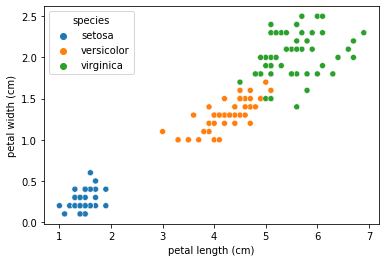

In [0]:
# YOUR PLOT HERE
import seaborn as sns

sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='species');

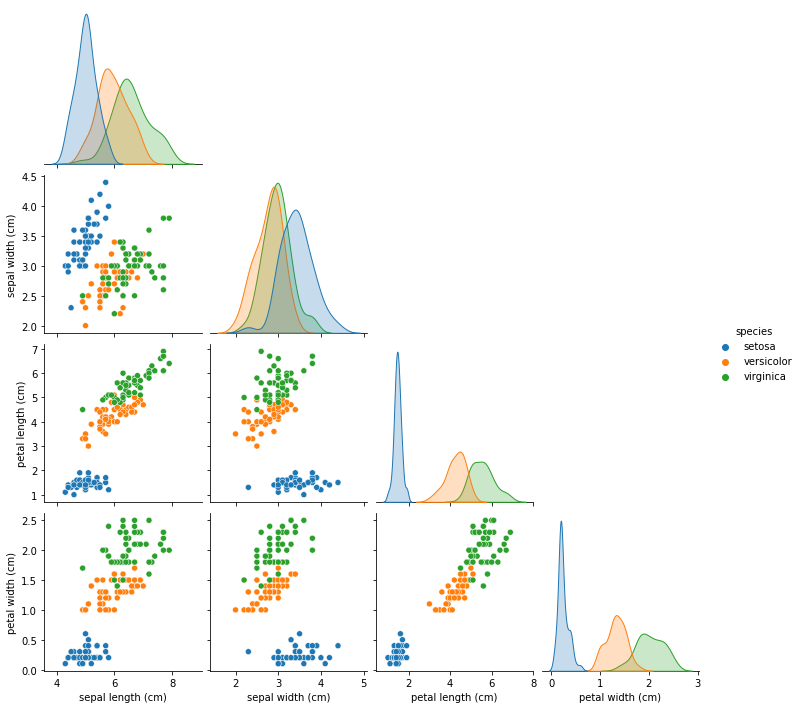

In [0]:
# Plot like a pro - let's see all the relationships between our columns
sns.pairplot(iris_df, hue="species", corner = True);

❓Are you able to differentiate these species based on your observations?

The _Iris setosa_ species seems to have clearly smaller petals than the 2 other species.

ℹ️ You can see that difference matches the observation of the photos

## Modelling

There are two strategies to tackle the multiclass problem:

- One vs One
- One vs All (One vs Rest)

### One vs One
- Trains **a model for each pair of classes** within the dataset
- At prediction time, the class which received the most votes is selected

<img src='images/ovo_multiclass.png' width=500 style='margin:auto'> 


👍Considers pair-specific differences


👎Creates a large number of sub models. Computationally expensive


### One vs Rest (One vs All)

- Trains **one model per class** against all others combined
- At prediction time, the class with the highest probability is selected

<img src='images/ova_multiclass.png' width=500 style='margin:auto'> 

👍Less heavy computationally


👎Loses pair-specific differences that get diluted in a combination of classes


## One Vs Rest

👇 Evaluate a model that predicts the iris species according to its features. Implement a One vs Rest multiclass strategy by tweaking the right parameter of `LogisticRegression`. Evaluate it by cross-validation and record the time it takes to do so.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = iris_df.drop(columns = "species")
y = iris_df['species']

ovr_log_model = LogisticRegression(multi_class='ovr')

ovr_cv_results = cross_validate(ovr_log_model,X,y)

ovr_cv_results['test_score'].mean()

0.9400000000000001

In [0]:
ovr_cv_results['fit_time'].sum() + ovr_cv_results['score_time'].sum()

0.0864570140838623

## One Vs One

👇 This time, implement a OneVsOneclassifier. There is no parameter to directly specify a OvO multiclass strategy in `LogisticRegression`. You'll need to find an alternative way to do so 😉

Again, Evaluate by cross-validation and record the time it takes to do so.

In [0]:
from sklearn.multiclass import OneVsOneClassifier

ovo_log_model = OneVsOneClassifier(LogisticRegression())

cv_results = cross_validate(ovo_log_model,X,y)

cv_results['test_score'].mean()

0.9733333333333334

In [0]:
cv_results['fit_time'].sum() + cv_results['score_time'].sum()

0.13854742050170898

ℹ️ As expected, the One on One strategy has better results because it preserves pair specific. However, it is more computationally expensive.

❓The botanist is able to find the right species 9 times over 10, can you beat him?

<details>
<summary> 👉Solution </summary>
You should get a mean accuracy of 97% which is more than 90%. So our algorithm beats the botanist!

</details>

# 🏁 